In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import warnings
import shutil
import glob
warnings.filterwarnings("ignore")

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228827136/228813984 [==============================] - 1s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(base_dir).glob('*/*.jpg')
list(data_dir)

[PosixPath('/root/.keras/datasets/flower_photos/daisy/3084924076_4d5c5711af_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/9242705328_eee8402a8d.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/3711723108_65247a3170.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/3758221664_b19116d61f.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/5794839_200acd910c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14221848160_7f0a37c395.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14471433500_cdaa22e3ea_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4613992315_143ccc2a10_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/20580471306_ab5a011b15_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/134372449_0f7166d96c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/8964198962_6d8593b533.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4697206799_19dd2a3193_

In [ ]:
base_dir

'/root/.keras/datasets/flower_photos'

In [ ]:
img_path = list(pathlib.Path(base_dir).glob('*/*.jpg'))[5]
img_path

PosixPath('/root/.keras/datasets/flower_photos/daisy/14221848160_7f0a37c395.jpg')

In [ ]:
img = load_img(img_path, grayscale = False, color_mode = "rgb")
img = img_to_array(img)
img.shape

(331, 500, 3)

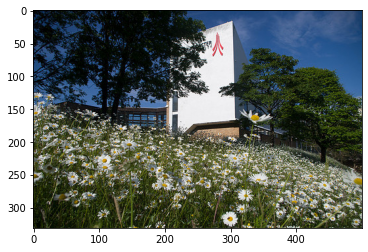

In [ ]:
plt.imshow(img/255)

In [ ]:
image_gen = ImageDataGenerator(rescale = 1./255)

data_gen  = image_gen.flow_from_directory(
    batch_size = 32,
    directory = base_dir,
    shuffle = True,
    target_size = (200,200)
)

Found 3670 images belonging to 5 classes.


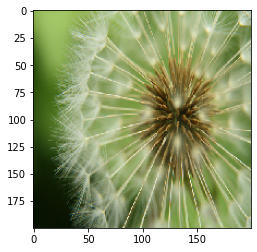

In [ ]:
plt.imshow(data_gen[0][0][14])

In [ ]:
os.path.abspath(pathlib.Path(base_dir))

'/root/.keras/datasets/flower_photos'

In [ ]:
base_dirname = os.path.abspath(pathlib.Path(base_dir))
base_dirname

'/root/.keras/datasets/flower_photos'

In [ ]:
for cl in os.listdir(os.path.abspath(pathlib.Path(base_dir))):
    img_path = os.path.join(base_dir,cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl,len(images)))
    num_train = int(round(len(images)*0.8))
    train, val = images[:num_train], images[num_train:]
    
    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train',cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    
    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))

daisy: 633 Images
dandelion: 898 Images
LICENSE.txt: 0 Images
sunflowers: 699 Images
roses: 641 Images
tulips: 799 Images


In [ ]:
train_dir = os.path.join(base_dirname,'train')
val_dir = os.path.join(base_dirname,'val')
print(train_dir)
print(val_dir)

/root/.keras/datasets/flower_photos/train
/root/.keras/datasets/flower_photos/val


## Image Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (200,200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    directory = val_dir,
    target_size = (200,200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [ ]:
classes_number = np.unique(train_generator.classes).shape[0]

## Convolutional Neural Network

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "same", activation = 'relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1,1)))

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(classes_number, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      12832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 32)       0

In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer = 'SGD', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(
    generator = train_generator,
    validation_data = validation_generator,
    epochs = 30
)

Epoch 1/30
92/92 [==============================] - 25s 138ms/step - loss: 1.5477 - accuracy: 0.2923 - val_loss: 1.4243 - val_accuracy: 0.3796
Epoch 2/30
92/92 [==============================] - 12s 134ms/step - loss: 1.4523 - accuracy: 0.3584 - val_loss: 1.3559 - val_accuracy: 0.4327
Epoch 3/30
92/92 [==============================] - 12s 134ms/step - loss: 1.2925 - accuracy: 0.4569 - val_loss: 1.1684 - val_accuracy: 0.5116
Epoch 4/30
92/92 [==============================] - 12s 133ms/step - loss: 1.1914 - accuracy: 0.4968 - val_loss: 1.1333 - val_accuracy: 0.5483
Epoch 5/30
92/92 [==============================] - 12s 133ms/step - loss: 1.1292 - accuracy: 0.5322 - val_loss: 1.1101 - val_accuracy: 0.5524
Epoch 6/30
92/92 [==============================] - 12s 133ms/step - loss: 1.0998 - accuracy: 0.5622 - val_loss: 1.1131 - val_accuracy: 0.5415
Epoch 7/30
92/92 [==============================] - 12s 132ms/step - loss: 1.0584 - accuracy: 0.5779 - val_loss: 1.0573 - val_accuracy: 0.5605

In [ ]:
def history_plot(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(history.history["accuracy"], 'bo', label='Training Accuracy')
    ax1.plot(history.history["val_accuracy"], 'b', label='Validation Accuracy')
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='best')
    ax2.plot(history.history["loss"], 'bo', label='Training Loss')
    ax2.plot(history.history["val_loss"], 'b', label='Validation Loss')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Error')
    ax2.legend(loc='best')
    plt.show()

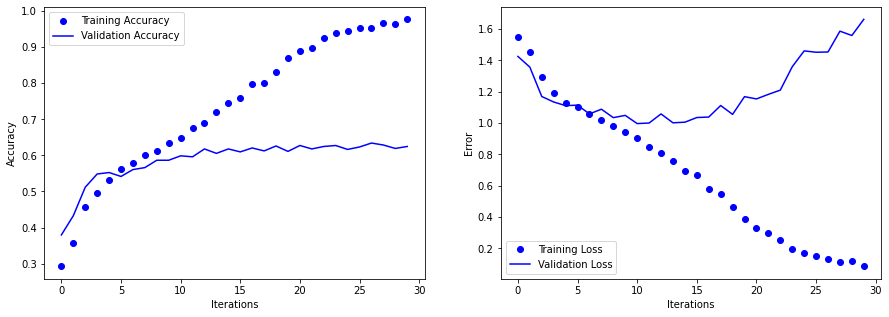

In [ ]:
history_plot(history)

### Overfitting fix it 

* <u>Data Augmentation</u>
* Early Stopping 
* Hyperparameters 
* Update the CNN parameters 

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = (200,200,3)))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))


model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))

model1.add(Dense(classes_number, activation = 'softmax'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 50, 50, 32)       

In [ ]:
model1.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
train_datagen1 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

validation_datagen1 = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator1 = train_datagen1.flow_from_directory(
    directory = train_dir,
    target_size = (200,200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

validation_generator1 = validation_datagen1.flow_from_directory(
    directory = val_dir,
    target_size = (200,200),
    batch_size = 32,
    color_mode = 'rgb',
    class_mode = 'categorical'
)

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


In [ ]:
x_train, y_train = train_generator1[0]

In [ ]:
x_train[0].shape

(200, 200, 3)

In [ ]:
for data_batch, labels_batch in train_generator1:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (32, 200, 200, 3)
labels batch shape (32, 5)


In [ ]:
hist = model1.fit_generator(
    generator = train_generator1,
    epochs = 30,
    validation_data = validation_generator1,
)

Epoch 1/30
92/92 [==============================] - 34s 365ms/step - loss: 1.5367 - accuracy: 0.3046 - val_loss: 1.3870 - val_accuracy: 0.4109
Epoch 2/30
92/92 [==============================] - 32s 353ms/step - loss: 1.3272 - accuracy: 0.4109 - val_loss: 1.2482 - val_accuracy: 0.4599
Epoch 3/30
92/92 [==============================] - 33s 359ms/step - loss: 1.2065 - accuracy: 0.4681 - val_loss: 1.1879 - val_accuracy: 0.5143
Epoch 4/30
92/92 [==============================] - 32s 353ms/step - loss: 1.1417 - accuracy: 0.5298 - val_loss: 1.0786 - val_accuracy: 0.5605
Epoch 5/30
92/92 [==============================] - 32s 350ms/step - loss: 1.0858 - accuracy: 0.5646 - val_loss: 1.0410 - val_accuracy: 0.5973
Epoch 6/30
92/92 [==============================] - 32s 352ms/step - loss: 1.0118 - accuracy: 0.6123 - val_loss: 0.9604 - val_accuracy: 0.5959
Epoch 7/30
92/92 [==============================] - 32s 351ms/step - loss: 0.9666 - accuracy: 0.6313 - val_loss: 0.8554 - val_accuracy: 0.6789

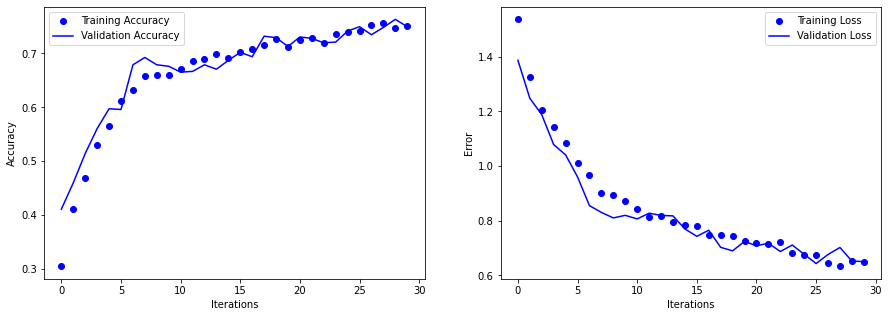

In [ ]:
history_plot(hist)

In [ ]:
print('conv_model before Freezing'
                  'known weights:', len(model1.trainable_weights))

conv_model before Freezingknown weights: 12


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 5))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size = (200,200),
                                           batch_size = batch_size,
                                           class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model1.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
            
    return features,labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 2000)
"""validation_features, validation_labels = extract_features(val_dir, 1000)"""

Found 2935 images belonging to 5 classes.


'validation_features, validation_labels = extract_features(val_dir, 1000)'

## Visualizing Intermediate Outputs

In [ ]:
img = load_img(img_path, target_size = (200,200))
img_tensor = img_to_array(img)
img_tensor.shape

(200, 200, 3)

In [ ]:
img_tensor = np.expand_dims(img_tensor,axis = 0)
img_tensor.shape

(1, 200, 200, 3)

In [ ]:
img_tensor /= 255.

In [ ]:
img_tensor.shape

(1, 200, 200, 3)

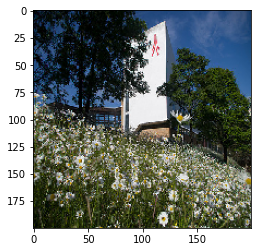

In [ ]:
plt.imshow(img_tensor[0])

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs

[<KerasTensor: shape=(None, 200, 200, 8) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 100, 100, 8) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 100, 100, 16) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 100, 100, 16) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 100, 100, 32) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 50, 50, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 80000) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense')>]

In [ ]:
from keras import models
activation_model = models.Model(inputs = model.inputs, outputs = layer_outputs)
activation_model

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
activations[0].shape

(1, 200, 200, 8)

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 200, 200, 8)


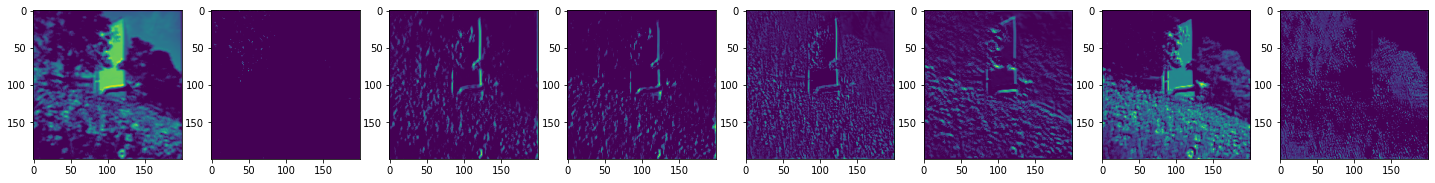

In [ ]:
fig = plt.figure(figsize = (25,25))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(first_layer_activation[0, :, : , i], cmap = "viridis")
plt.show()